In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## Inspecting Material Data

In [55]:
text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/Refractive_index/1nmRez/PSK_1.57eV.csv', delimiter=',', header=1)
WL, n, k, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/Refractive_index/1nmRez/PSK_1.65eV.csv', delimiter=',', header=1)
WL1, n1, k1, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/Refractive_index/1nmRez/PSK_1.67eV.csv', delimiter=',', header=1)
WL2, n2, k2, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/Refractive_index/1nmRez/PSK_1.69eV.csv', delimiter=',', header=1)
WL3, n3, k3, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/Refractive_index/1nmRez/PSK_1.75eV.csv', delimiter=',', header=1)
WL4, n4, k4, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/MAFASnPbI3.csv', delimiter=',', header=1)
WL5, n5, k5, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)


text = pd.read_csv('/Volumes/GoogleDrive/My Drive/Optical_Simulations/Material_data/MAFASnPbI3_shifted_to85.csv', delimiter=',', header=1)
WL6, n6, k6, = text.iloc[:,0], text.iloc[:,1], text.iloc[:,2]
WL_0 = np.arange(280, 1801, 1)

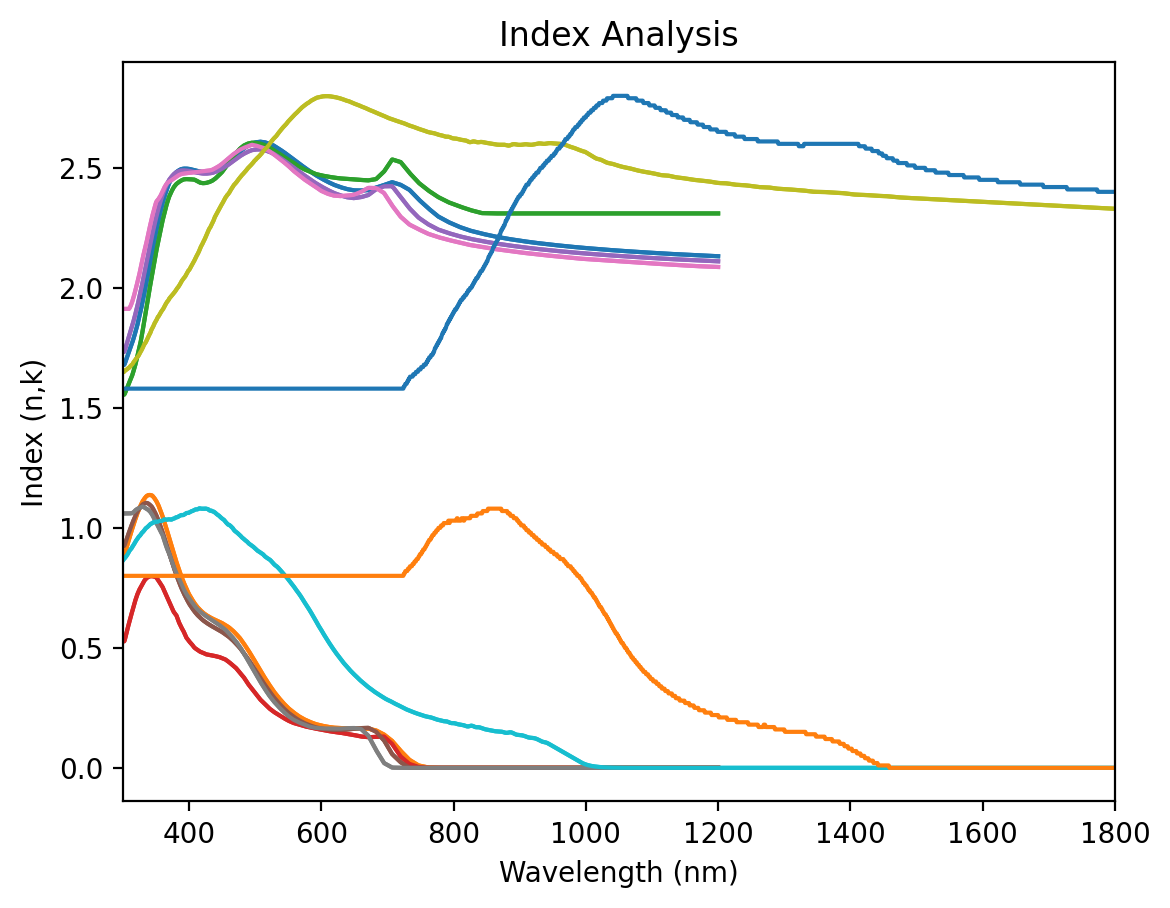

In [56]:
# plt.plot(WL, n, label='n_1.57')
# plt.plot(WL, k, label='k_1.57')

plt.plot(WL1, n1, label='n_1.65')
plt.plot(WL1, k1, label='k_1.65')

plt.plot(WL2, n2, label='n_1.67')
plt.plot(WL2, k2, label='k_1.67')

plt.plot(WL3, n3, label='n_1.69')
plt.plot(WL3, k3, label='k_1.69')

plt.plot(WL4, n4, label='n_1.75')
plt.plot(WL4, k4, label='k_1.75')

plt.plot(WL5, n5, label='n_1.22')
plt.plot(WL5, k5, label='k_1.22')

plt.plot(WL6, n6, label='n_0.85')
plt.plot(WL6, k6, label='k_0.85')

# Complex Refractive Indicies of MA0.4FA0.6Sn0.6Pb0.4I3

plt.title('Index Analysis')
 
plt.xlim(300,1800)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Index (n,k)')
# plt.legend(bbox_to_anchor=(1,1), loc='upper right')
plt.show() 

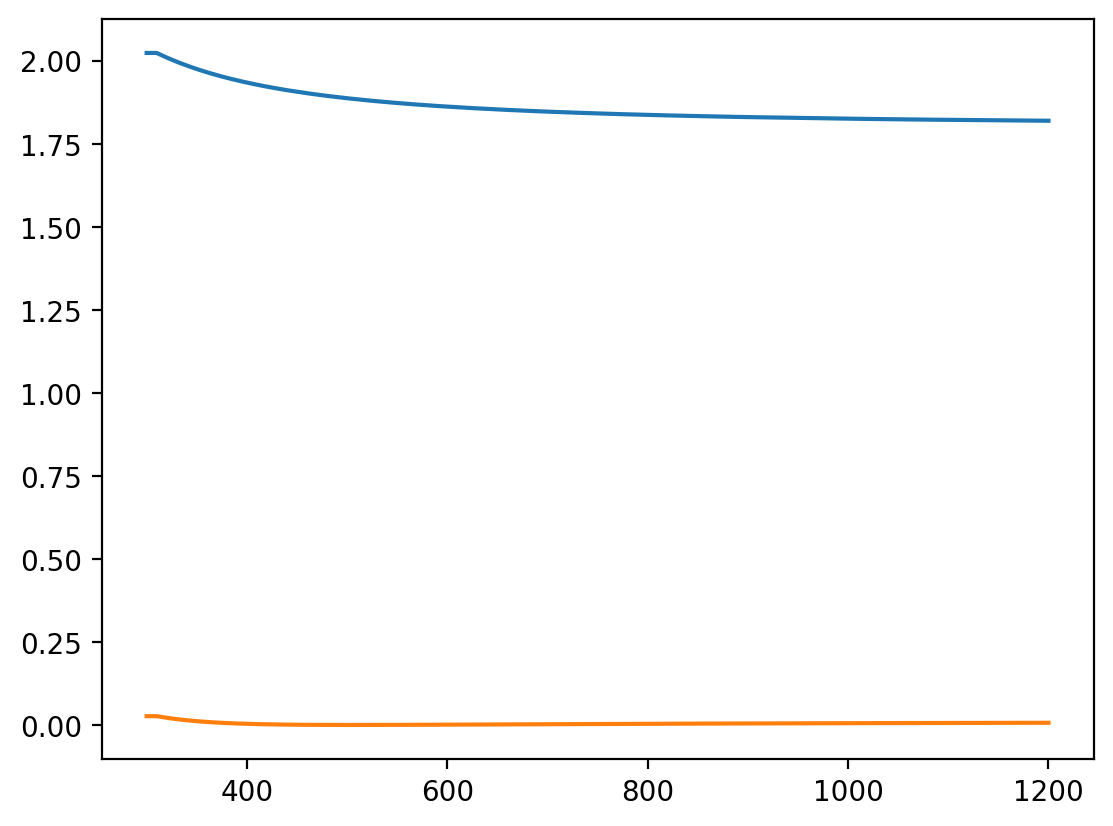

In [120]:
k_adj = np.interp(WL_0, WL, k)
n_adj = np.interp(WL_0, WL, n)
plt.plot(WL_0, n_adj)
plt.plot(WL_0, k_adj)
plt.show()

In [121]:
index = pd.DataFrame({'wl':WL_0, 'n':n_adj, 'k':k_adj})
with open('SiNx.csv', 'w', newline='') as f:
    index.to_csv(f, header=True, index=False)

In [38]:
df=[]
df=pd.DataFrame({'WL':[WL], 'n':[n], 'k':[k]})

#### Smoothing Data

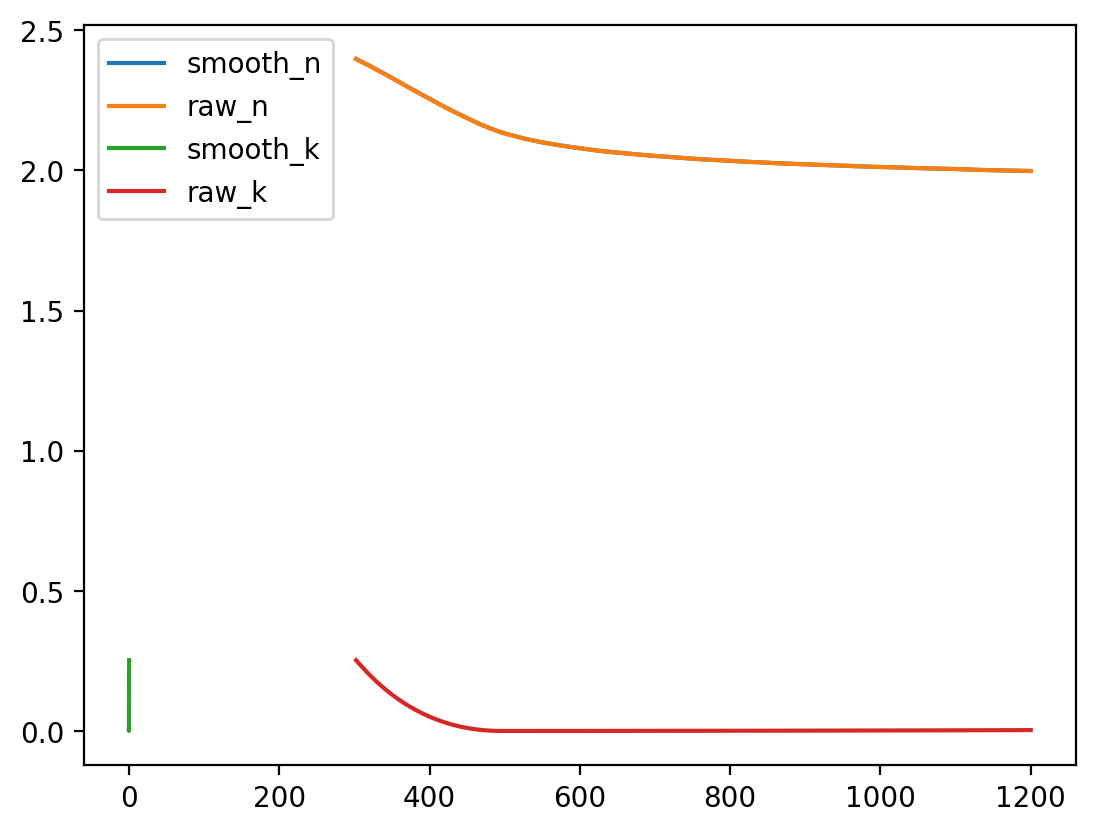

In [39]:
from functools import partial #https://docs.python.org/2/library/functools.html
from scipy.signal import savgol_filter
window = 13
order = 11

#savgol_filter to smooth the data
df['n_smooth'] = df['n'].apply(
    partial(savgol_filter, window_length = window, polyorder = order)
)

df['k_smooth'] = df['k'].apply(
    partial(savgol_filter, window_length = window, polyorder = order)
)

k_smooth=df['k_smooth'][0]
n_smooth=df['n_smooth'][0]


plt.plot(np.array(WL_n),n_smooth, label='smooth_n')
plt.plot(WL, n, label='raw_n')

plt.plot(np.array(WL_k),k_smooth, label='smooth_k')
plt.plot(WL, k, label='raw_k')


plt.legend()
plt.show()

In [30]:
WL_0 = np.linspace(400, 1200, 200)
k_adj = np.interp(WL_0, WL_k, k)
n_adj = np.interp(WL_0, WL_n, n)

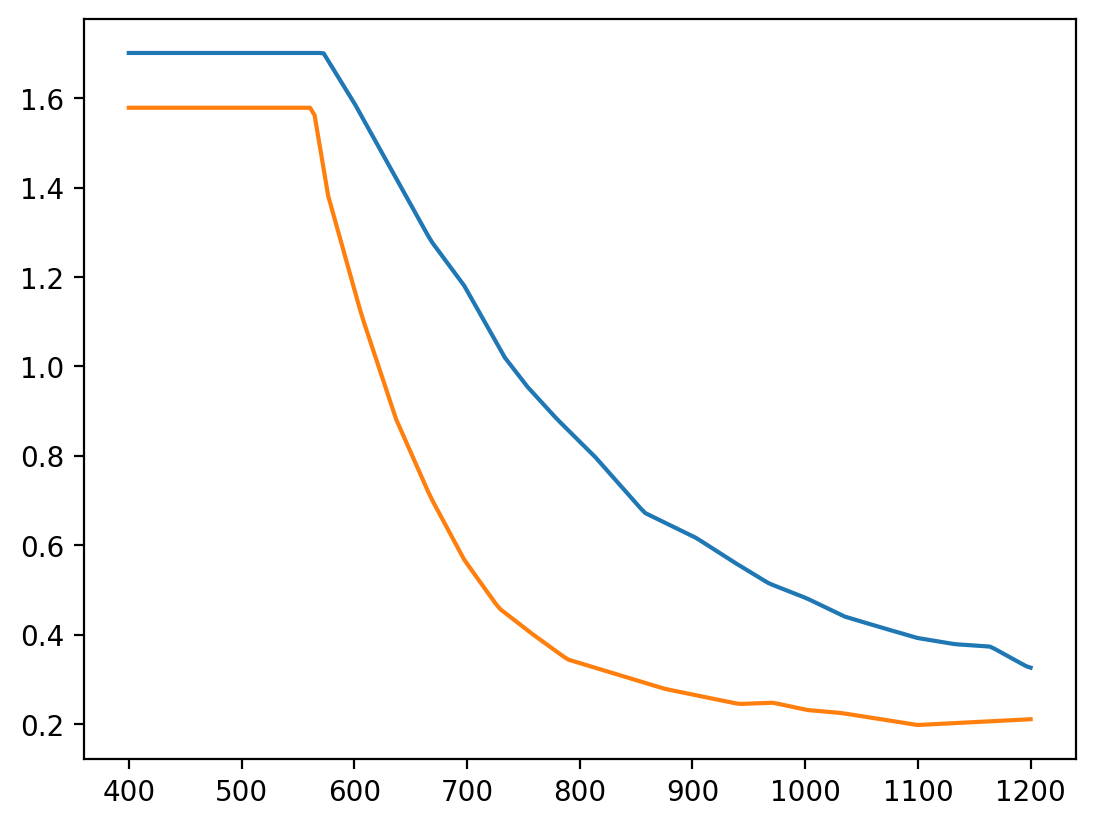

In [31]:
plt.plot(WL_0, n_adj)
plt.plot(WL_0, k_adj)
plt.show()

In [11]:
PSK_gap = pd.DataFrame({'wl':np.array(WL_0), 'n':n_adj, 'k':k_adj})


In [23]:
# Gede_MAPI_Export
with open('SiH.csv', 'w', newline='') as f:
    PSK_gap.to_csv(f, header=True, index=False)